# Question 3  
  
(10 marks) Use the data set in Question 2.

In [2]:
library(MASS)
library(cluster)
library(tidyverse)
library(factoextra)
data <- read.table(file = "/Users/alexwiigs/Documents/Code/STAT 553 Assigmnents/Assignment 5/T15_13_POLLUTION.dat")
colnames(data) <- c("City", "SO2 content", "Temperature", "Manfacturing Enterprises", "Population Size", "Wind Speed", "Precipitation", "Days of Precipitation")
Y <- as.matrix(data[,-1])

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.3     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



a) Carry ouy a k-means cluster analysis. Present a three-cluster solution.

By calculating the following:

In [3]:
set.seed(191)
cluster <- kmeans(Y, centers=3, nstart = 25)
cluster
table(cluster$cluster)

K-means clustering with 3 clusters of sizes 1, 8, 32

Cluster means:
  SO2 content Temperature Manfacturing Enterprises Population Size Wind Speed
1    110.0000     50.6000                3344.0000       3369.0000    10.4000
2     40.0000     55.4625                 903.0000       1070.2500    10.2500
3     25.0625     56.0000                 263.0938        406.9375     9.2125
  Precipitation Days of Precipitation
1      34.44000              122.0000
2      36.64375              116.6250
3      36.87312              112.9688

Clustering vector:
 [1] 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 2 2 2 3 2 3 3 3 3 3 2 3 2 3 3 3 3 2 2 3 3 3
[39] 3 3 3

Within cluster sum of squares by cluster:
[1]       0 2389059 2021709
 (between_SS / total_SS =  83.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


 1  2  3 
 1  8 32 

We can view the following three-cluster solution:

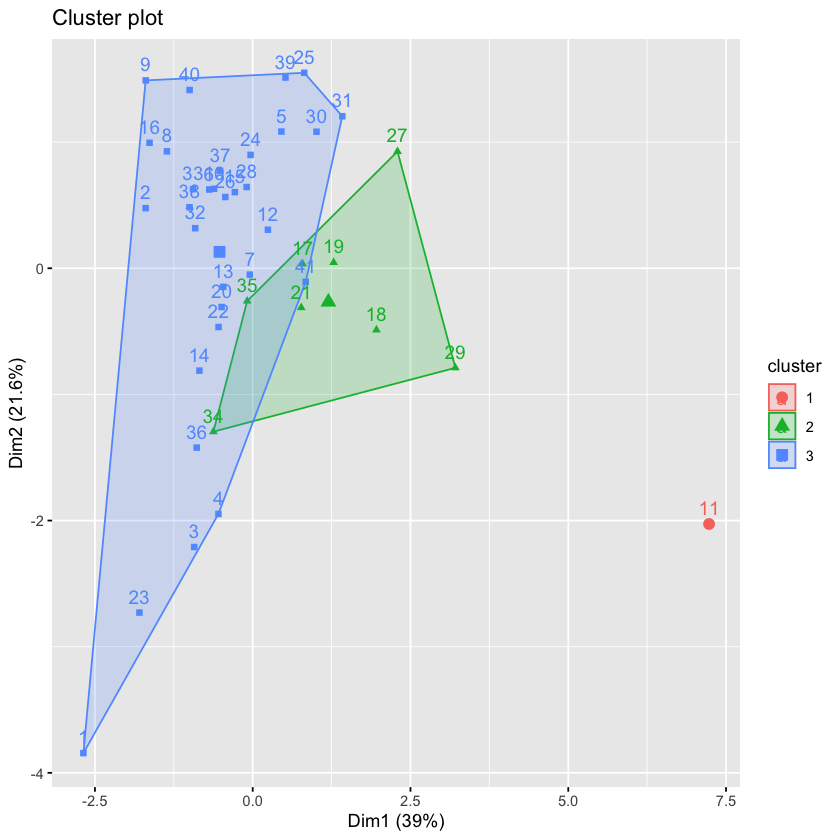

In [4]:
fviz_cluster(cluster, data = Y)


Which is sumamrized below.

Cluster 1:

In [5]:
# Cluster 1
data[11,]

,City,SO2 content,Temperature,Manfacturing Enterprises,Population Size,Wind Speed,Precipitation,Days of Precipitation
,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
11,Chicago,110,50.6,3344,3369,10.4,34.44,122


Cluster 2:

In [6]:
# Cluster 2
data[c(34,35,21,17,19,18,29,27),]

,City,SO2 content,Temperature,Manfacturing Enterprises,Population Size,Wind Speed,Precipitation,Days of Precipitation
,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
34,Dallas,9,66.2,641,844,10.9,35.94,78
35,Houston,10,68.9,721,1233,10.8,48.19,103
21,St.Louis,56,55.9,775,622,9.5,35.89,105
17,Baltimore,47,55.0,625,905,9.6,41.31,111
19,MinneapolisSt.Paul,29,43.5,699,744,10.6,25.94,137
18,Detroit,35,49.9,1064,1513,10.1,30.96,129
29,Philadelphia,69,54.6,1692,1950,9.6,39.93,115
27,Cleveland,65,49.7,1007,751,10.9,34.99,155


Cluster 3: Everything else.

In [7]:
data[-c(34,35,21,17,19,18,29,27,11),]

,City,SO2 content,Temperature,Manfacturing Enterprises,Population Size,Wind Speed,Precipitation,Days of Precipitation
,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1,Phoenix,10,70.3,213,582,6.0,7.05,36
2,LittleRock,13,61.0,91,132,8.2,48.52,100
3,San.Fran,12,56.7,453,716,8.7,20.66,67
4,Denver,17,51.9,454,515,9.0,12.95,86
5,Hartford,56,49.1,412,158,9.0,43.37,127
6,Wilmington,36,54.0,80,80,9.0,40.25,114
7,Washington,29,57.3,434,757,9.3,38.89,111
8,Jacksonville,14,68.4,136,529,8.8,54.47,116
9,Miami,10,75.5,207,335,9.0,59.80,128


b) Find the first two discriminant functions using the three clusters as groups. Use the two discriminant functions to view the three clusters.

We can find the first two discriminant functions using the three clusters as groups like so:

In [8]:
model <- lda(Y, cluster$cluster)
discriminant_functions <- cbind( model$scaling[,1], model$scaling[,2] )
colnames(discriminant_functions) <- c("a1", "a2")
t(discriminant_functions)

,SO2 content,Temperature,Manfacturing Enterprises,Population Size,Wind Speed,Precipitation,Days of Precipitation
a1,-0.006657355,-0.0604216,-0.005845222,0.0008676621,-0.1326508,0.01446504,0.0005595004
a2,-0.017475487,-0.1445221,0.003220421,-0.0024120143,-0.7370003,0.06723798,-0.0296265258


In [9]:
Y_bar <- matrix(ncol = 7, nrow = 41)
for (i in 1:7) { Y_bar[,i] = mean(Y[,i]) }
Z = t(discriminant_functions) %*% t(Y - Y_bar)
rownames(Z) <- c("z1", "z2")
Z

z1,0.6772985,1.885758,0.05518771,-0.00901087,0.2992427,1.9568555,0.2611183,1.5288361,0.6004175,0.3662896,...,0.7369787,1.161780,-1.551338,-1.646781,1.6045216,1.627169,1.520073,0.7760697,2.530745,-0.2422166
z2,0.3561570,1.611161,0.74318319,0.53513811,1.8147790,0.7504502,-0.3207129,-0.8045867,-1.2087507,0.2385406,...,0.3362524,1.074137,-1.200545,-2.132168,0.5512657,-1.367141,1.384090,-0.7073137,1.410008,-0.7441341


Which allows us to view the three clusters:

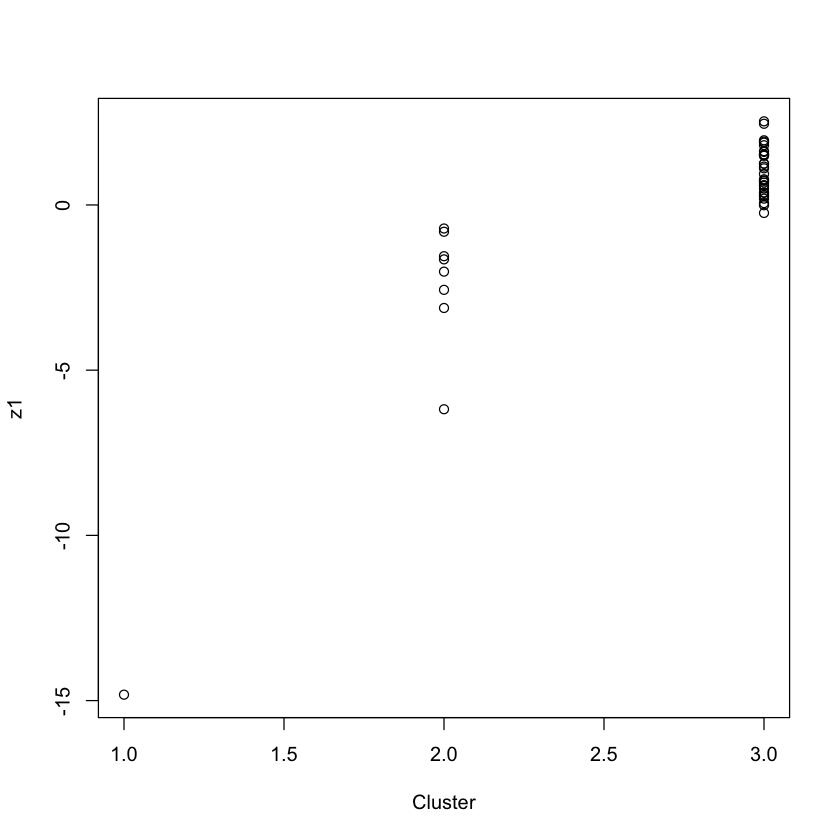

In [10]:
plot(as.integer(cluster$cluster),Z[1,], xlab = "Cluster", ylab = "z1")

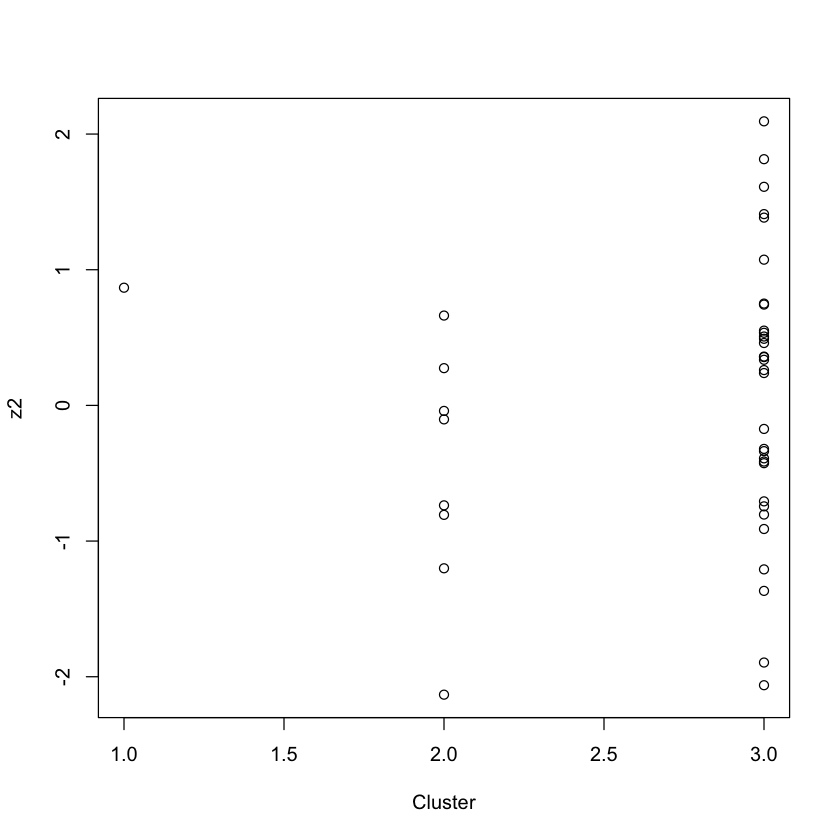

In [11]:
plot(as.integer(cluster$cluster),Z[2,], xlab = "Cluster", ylab = "z2")

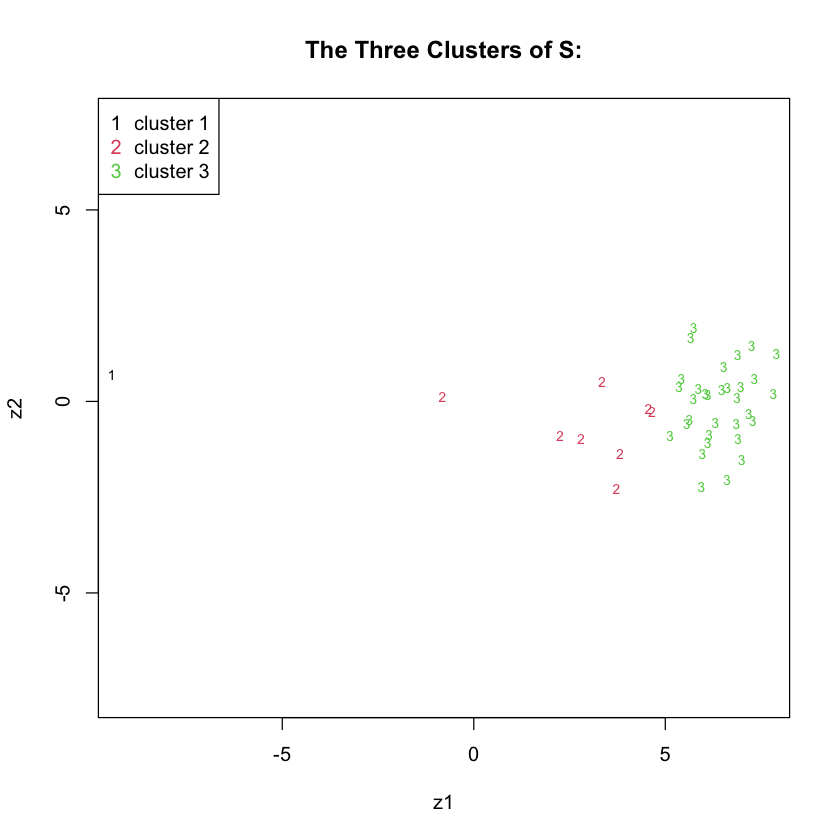

In [12]:
plot(model, col = cluster$cluster, pch = cluster$cluster, xlab = "z1", ylab = "z2", main = "The Three Clusters of S:")
legend("topleft", legend = paste("cluster", 1:3), , pch = as.character(1:3), col = 1:3)

c) Use PCA based on correlation matrix $\textbf{R}$ to view the three clusters.

In [13]:
R <- cor(Y)
round(R,2)


,SO2 content,Temperature,Manfacturing Enterprises,Population Size,Wind Speed,Precipitation,Days of Precipitation
SO2 content,1.00,-0.43,0.64,0.49,0.09,0.05,0.37
Temperature,-0.43,1.00,-0.19,-0.06,-0.35,0.39,-0.43
Manfacturing Enterprises,0.64,-0.19,1.00,0.96,0.24,-0.03,0.13
Population Size,0.49,-0.06,0.96,1.00,0.21,-0.03,0.04
Wind Speed,0.09,-0.35,0.24,0.21,1.00,-0.01,0.16
Precipitation,0.05,0.39,-0.03,-0.03,-0.01,1.00,0.50
Days of Precipitation,0.37,-0.43,0.13,0.04,0.16,0.50,1.00


Repeating the steps above with $R$, we get...

In [14]:
A_2 <- eigen(R)$vectors[,1:2]
colnames(A_2) <- c("a1", "a2")
t(A_2)

a1,0.48969882,-0.31537069,0.5411687,0.4875881,0.24987493,0.0001873122,0.2601791
a2,-0.08457563,0.08863789,0.2258811,0.2820038,-0.05547149,-0.6258793663,-0.6779674


Which allows us to view the three clusters.

z1,-2.68265,-1.6966680,-0.9274435,-0.5431145,0.4547229,-0.6885227,-0.04555952,-1.3591296,-1.694675,-0.6109983,...,-0.9109406,-0.9457782,-0.6232184,-0.08771464,-0.8872162,-0.5172144,-1.0012137,0.5195842,-0.9995106,0.8402408
z2,3.84369,-0.4765005,2.2097945,1.9477464,-1.0838698,-0.6243922,0.05027326,-0.9268824,-1.489491,-0.6302598,...,-0.3176881,-0.6268374,1.2956096,0.25974239,1.4217997,-0.7727563,-0.4838457,-1.5120340,-1.4132303,0.1076145


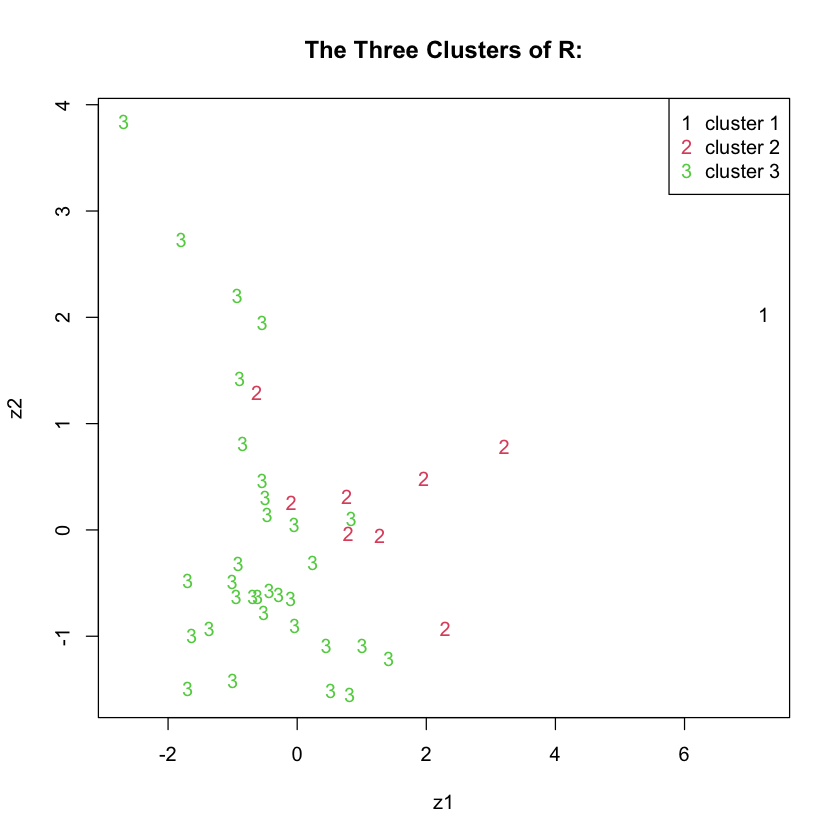

In [15]:
Z_2 <- t(A_2) %*% t(scale(Y))
rownames(Z_2) <- c("z1", "z2")
Z_2
plot(Z_2[1,], Z_2[2,], pch = as.character(cluster$cluster), col = cluster$cluster, xlab = "z1", ylab = "z2", main = "The Three Clusters of R:")
legend("topright", legend = paste("cluster", 1:3), , pch = as.character(1:3), col = 1:3)